In [2]:
# Modules
import pandas as pd
import io
import networkx as nx
import matplotlib.pyplot as plt
import os

from pathlib import Path
import tempfile
import pprint
from IPython.display import Image

import pickle

# Dataset D1

In [3]:
# load dataset D1
df_d1 = pd.read_csv('paperid_title.csv')
print(df_d1)

# fillna() helps to replace all NaN values in a DataFrame
df_d1['Subtitle'].fillna("", inplace=True)

# Using + operator to combine two columns
df_d1["Title"] = df_d1['Title'].astype(str) +" "+ df_d1["Subtitle"].astype(str)

# drop a column
df_d1 = df_d1.drop(columns = ['Subtitle'])

df_d1.duplicated(subset = None, keep = 'first')

# convert pandas df into iterative data
D1 = df_d1.to_dict('list')

""" D1 is of structure: 
{
"paperid" : [ids...],
"Title" : [titles...]
}
"""

        paperid                                              Title  \
0             1  Toward identifying inter-project clone sets fo...   
1             2  A proposal for chemical information retrieval ...   
2             3  What does psychology and psychiatry need from ...   
3             4  Scalable detection of missed cross-function re...   
4             5  Exploiting information context to improve prod...   
...         ...                                                ...   
148923   148924  Exploiting reference section to classify paper...   
148924   148925                                       Instant IDEs   
148925   148926  Advancing the discovery of unique column combi...   
148926   148927  A Monte Carlo algorithm for cold start recomme...   
148927   148928                                              BLOCK   

                                                 Subtitle  
0                                                     NaN  
1                                      

' D1 is of structure: \n{\n"paperid" : [ids...],\n"Title" : [titles...]\n}\n'

# Class and its methods for data dumps

In [4]:
class MyClass():
    def __init__(self, param):
        self.param = param

In [5]:
def load_object(filename):
    try:
        with open(filename, "rb") as f:
            return pickle.load(f)
    except Exception as ex:
        print("Error during unpickling object (Possibly unsupported):", ex)

# Networkx graph

In [7]:
citation_dict = load_object("Part1_citation_dict.pickle").param
pp = pprint.PrettyPrinter(indent = 4)
pp.pprint(citation_dict)

{   2031: [45344],
    4025: [130133, 59980, 104017],
    5813: [   46492,
              9952,
              2250,
              91189,
              7278,
              69920,
              41821,
              30105,
              134687,
              104465,
              104465,
              76500,
              119938,
              47613,
              61782,
              5813],
    8228: [732, 30691],
    8690: [   90365,
              16173,
              101508,
              63858,
              2425,
              100153,
              139833,
              114021,
              124427,
              43428,
              19569],
    10778: [   56335,
               3810,
               21520,
               12821,
               1005,
               112544,
               12821,
               219,
               56335,
               1055,
               111242,
               519,
               9413,
               8351,
               7948,
               3810,
      

In [92]:
node_list = []

In [93]:
for node in citation_dict:
    node_list.append(node)
    node_list.extend(citation_dict[node])

In [94]:
node_list = [*set(node_list)]

In [95]:
# intialize networkx graph object
citation_graph = nx.Graph()

In [96]:
for node in range(len(node_list)):
    dict = {}
    dict["Title"] = D1['Title'][D1['paperid'].index(node_list[node])]
    node_list[node] = (node_list[node], dict)
pp.pprint(node_list)

[   (36871, {'Title': 'Composable memory transactions '}),
    (118793, {'Title': 'From relational verification to SIMD loop synthesis '}),
    (135178, {'Title': 'Generic global placement and floorplanning '}),
    (   71693,
        {   'Title': 'A polynomial quantum algorithm for approximating the '
                     'Jones polynomial '}),
    (   104465,
        {   'Title': 'Fabric a platform for secure distributed computation and '
                     'storage'}),
    (   96278,
        {   'Title': 'Computation in networks of passively mobile finite-state '
                     'sensors '}),
    (   145432,
        {   'Title': 'Inapproximability of Combinatorial Problems via Small '
                     'LPs and SDPs '}),
    (124957, {'Title': 'An expressive mechanism for auctions on the web '}),
    (   83997,
        {   'Title': 'Tatonnement beyond gross substitutes? gradient descent '
                     'to the rescue'}),
    (36893, {'Title': 'Online education '}),


In [97]:
# create nodes in graph
citation_graph.add_nodes_from(node_list)

In [98]:
# create edges in graph
for key in citation_dict:
    for val in citation_dict[key]:
        print(key, val)
        citation_graph.add_edge(key, val)

70680 137204
26551 17950
26551 56726
26551 48035
26551 9429
26551 14887
26551 2474
98574 111777
98574 130875
98574 58633
98574 9889
98574 118008
98574 79670
98574 109659
98574 33133
86315 86315
86315 40279
79254 99558
79254 34772
79254 15053
79254 82598
79254 73397
79254 17380
71745 138955
71745 88291
71745 4045
71745 50219
71745 31062
2031 45344
15450 12574
125599 94272
125599 127131
95819 121881
95819 67885
95819 88531
95819 76918
111710 101423
111710 54890
111710 116439
111710 81453
53284 97571
29407 27905
132158 91598
132158 24547
132158 123978
132158 123978
132158 124169
132158 46793
132158 90733
132158 105149
132158 76813
132158 132158
115558 21520
115558 1005
115558 79624
115558 118116
115558 3810
115558 145217
115558 867
115558 59456
42584 47410
42584 117425
42584 37871
42584 34005
106495 1649
106495 73800
106495 146833
106495 101036
106495 82876
106495 7521
106495 107152
106495 32683
106495 143700
10778 56335
10778 3810
10778 21520
10778 12821
10778 1005
10778 112544
10778 128

In [99]:
def save_graph(obj):
    try:
        with open("Part2_citation_graph.pickle", "wb") as f:
            pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)
    except Exception as ex:
        print("Error during pickling object (Possibly unsupported):", ex)

In [100]:
citation_graph = MyClass(citation_graph)
save_graph(citation_graph)

In [104]:
# graph info
nx.info(citation_graph.param)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17276\4286249144.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(citation_graph.param)


'Graph with 493 nodes and 442 edges'

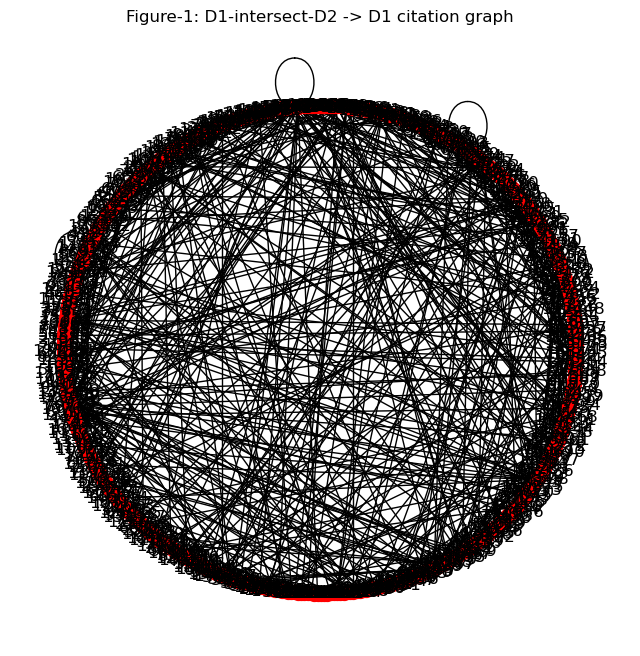

In [109]:
# draw graph
plt.figure(figsize = (8, 8))
plt.axis('off')
layout = nx.draw_circular(citation_graph.param, with_labels = True, node_color = 'r', node_size = 100, alpha = 1)
#nx.draw_networkx_nodes(citation_graph.param, pos = layout, node_size = 500, alpha = 0.8)
#nx.draw_networkx_edges(citation_graph.param, pos = layout, width = 3, style = 'dotted')
#nx.draw_networkx_labels(citation_graph.param, pos = layout, font_size = 15)
plt.title("Figure-1: D1-intersect-D2 -> D1 citation graph")
plt.show()

# Graph Analysis

In [47]:
# print node sets
pp.pprint(citation_graph.param.nodes())

NodeView((36871, 118793, 135178, 71693, 104465, 96278, 145432, 124957, 83997, 36893, 35, 53284, 8228, 102448, 77886, 94272, 71745, 59456, 116802, 28737, 114754, 49222, 73800, 55378, 63577, 102492, 131172, 53349, 96358, 145511, 65641, 104558, 108657, 18561, 14479, 88208, 104600, 127131, 102557, 8351, 57505, 82091, 77996, 145582, 131255, 20669, 80061, 121031, 98505, 12490, 65738, 2250, 65740, 219, 88291, 90365, 14589, 76030, 41216, 116990, 82178, 98557, 35076, 67844, 35077, 141574, 78089, 117002, 96523, 114957, 98574, 12574, 45344, 69920, 297, 86315, 67885, 47410, 98616, 127293, 143700, 31062, 61782, 59738, 31067, 104797, 135520, 33133, 94575, 63858, 92531, 22904, 2425, 90492, 33148, 121226, 10634, 57740, 147853, 106896, 90513, 39314, 12691, 147871, 92578, 43428, 43432, 2474, 115121, 57794, 47566, 84432, 131536, 88531, 33252, 90598, 76262, 80364, 8690, 98804, 53749, 25078, 49656, 47613, 131585, 117250, 141827, 519, 12821, 104981, 61976, 10778, 98842, 51741, 55841, 111138, 92709, 14887, 2

In [37]:
# print the number of nodes generated
citation_graph.number_of_nodes()

493

In [48]:
# print edge sets
pp.pprint(citation_graph.param.edges())

EdgeView([(36871, 61976), (118793, 61976), (135178, 14116), (71693, 100297), (104465, 5813), (96278, 51741), (96278, 49656), (145432, 56335), (124957, 72778), (83997, 13313), (36893, 65381), (35, 65381), (53284, 97571), (8228, 732), (8228, 30691), (102448, 43432), (77886, 116802), (94272, 125599), (71745, 138955), (71745, 88291), (71745, 4045), (71745, 50219), (71745, 31062), (59456, 115558), (116802, 26165), (116802, 54027), (116802, 121226), (116802, 143921), (116802, 142946), (116802, 4742), (116802, 12490), (116802, 116802), (28737, 137909), (114754, 61976), (49222, 65381), (73800, 106495), (55378, 92578), (63577, 144787), (102492, 30211), (131172, 21637), (53349, 118598), (96358, 82969), (145511, 6142), (145511, 31067), (145511, 35076), (65641, 91838), (65641, 13120), (65641, 30540), (65641, 140587), (65641, 115121), (65641, 36226), (65641, 126861), (65641, 68767), (65641, 76438), (104558, 98616), (104558, 93946), (108657, 65740), (18561, 65381), (14479, 65740), (88208, 128717), (

In [40]:
# print the number of edges generated
citation_graph.number_of_edges()

442

In [49]:
# adjacency view
pp.pprint(citation_graph.param.adj)

AdjacencyView({36871: {61976: {}}, 118793: {61976: {}}, 135178: {14116: {}}, 71693: {100297: {}}, 104465: {5813: {}}, 96278: {51741: {}, 49656: {}}, 145432: {56335: {}}, 124957: {72778: {}}, 83997: {13313: {}}, 36893: {65381: {}}, 35: {65381: {}}, 53284: {97571: {}}, 8228: {732: {}, 30691: {}}, 102448: {43432: {}}, 77886: {116802: {}}, 94272: {125599: {}}, 71745: {138955: {}, 88291: {}, 4045: {}, 50219: {}, 31062: {}}, 59456: {115558: {}}, 116802: {26165: {}, 54027: {}, 121226: {}, 143921: {}, 142946: {}, 77886: {}, 4742: {}, 12490: {}, 116802: {}}, 28737: {137909: {}}, 114754: {61976: {}}, 49222: {65381: {}}, 73800: {106495: {}}, 55378: {92578: {}}, 63577: {144787: {}}, 102492: {30211: {}}, 131172: {21637: {}}, 53349: {118598: {}}, 96358: {82969: {}}, 145511: {6142: {}, 31067: {}, 35076: {}}, 65641: {91838: {}, 13120: {}, 30540: {}, 140587: {}, 115121: {}, 36226: {}, 126861: {}, 68767: {}, 76438: {}}, 104558: {98616: {}, 93946: {}}, 108657: {65740: {}}, 18561: {65381: {}}, 14479: {657

In [52]:
# degree of a vertex
degrees = []
for node in citation_graph.param.nodes():
    degrees.append(citation_graph.param.degree(node))

In [57]:
print("Average degree: ", sum(degrees)/len(degrees))

Average degree:  1.793103448275862


In [58]:
# clustering coefficient for nodes
pp.pprint(nx.clustering(citation_graph.param))

{   35: 0,
    219: 0,
    297: 0,
    519: 0,
    732: 0,
    761: 0,
    867: 0,
    1005: 0,
    1042: 0,
    1055: 0,
    1062: 0,
    1070: 0,
    1072: 0,
    1649: 0,
    1651: 0,
    1696: 0,
    1718: 0,
    1894: 0,
    2031: 0,
    2250: 0,
    2425: 0,
    2474: 0,
    2608: 0,
    2872: 0,
    2888: 0,
    2990: 0,
    3166: 0,
    3169: 0,
    3484: 0,
    3688: 0,
    3810: 0,
    3949: 0,
    4025: 0,
    4045: 0,
    4742: 0,
    5418: 0,
    5464: 0,
    5493: 0,
    5749: 0,
    5791: 0,
    5813: 0,
    5906: 0,
    5999: 0,
    6142: 0,
    7278: 0,
    7412: 0,
    7521: 0,
    7682: 0,
    7683: 0,
    7795: 0,
    7948: 0,
    8228: 0,
    8351: 0,
    8690: 0,
    9413: 0,
    9429: 0,
    9483: 0,
    9889: 0,
    9952: 0,
    10167: 0,
    10634: 0,
    10778: 0,
    10946: 0,
    12490: 0,
    12574: 0,
    12691: 0,
    12821: 0,
    13120: 0,
    13211: 0,
    13313: 0,
    13339: 0,
    14116: 0,
    14479: 0,
    14589: 0,
    14887: 0,
    15053: 0,
   

In [59]:
# average clustering coefficient for nodes
print("Average clustering coefficient: ", nx.average_clustering(citation_graph.param))

Average clustering coefficient:  0.002260214430599826
